# Intro to pandas
- series object
- DataFrame object

In [35]:
import pandas as pd

data = dict(AI = 25, NET = 30, APP = 27, Java = 23)
series = pd.Series(data = data)
series

AI      25
NET     30
APP     27
Java    23
dtype: int64

In [31]:
data2 = dict(AI = "25", NET = 30, APP = 27, Java = 23)
pd.Series(data = data2)

AI      25
NET     30
APP     27
Java    23
dtype: object

In [32]:
# extracting values
print(f"series[0]: {series[0]}")
print(f"series[-1]: {series[-1]}")

#excrat keys
print(f"series.keys: {series.keys()}")
print(f"series.keys[-2]: {series.keys()[-2]}")

series[0]: 25
series[-1]: 23
series.keys: Index(['AI', 'net', 'APP', 'Java'], dtype='object')
series.keys[-2]: APP


# DataFrame

In [33]:
df = pd.DataFrame(series)
df

,0
AI,25
net,30
APP,27
Java,23


In [34]:
df = pd.DataFrame(series, columns=("Number students",))
df

,Number students
AI,25
net,30
APP,27
Java,23


In [36]:
languages = pd.Series(dict(AI = "python", NET = "C#", APP = "Kotlin", Java = "JAVA"))
df = pd.DataFrame({"Students":series, "Languages": languages})
df

,Students,Languages
AI,25,python
NET,30,C#
APP,27,Kotlin
Java,23,JAVA


In [29]:
df.index ## komma åt index

Index(['AI', 'APP', 'Ai', 'Java', 'NET', 'net'], dtype='object')

# Data selection

In [21]:
df.Students ## Gets a Series with attribute approch

APP     27.0
Ai      25.0
Java    23.0
NET      NaN
ai       NaN
net     30.0
Name: Students, dtype: float64

In [22]:
df["Students"] # gets a Series with dictionary-keys approach

APP     27.0
Ai      25.0
Java    23.0
NET      NaN
ai       NaN
net     30.0
Name: Students, dtype: float64

In [38]:
#multiple columns

df[["Languages", "Students"]]

,Languages,Students
AI,python,25
NET,C#,30
APP,Kotlin,27
Java,JAVA,23


In [50]:
# Wants to get all rows > 24 students
print(df["Students"] > 24) # __gt__()

large_groups = df[df["Students"] > 24] # picked out all rows that are True
large_groups

AI       True
NET      True
APP      True
Java    False
Name: Students, dtype: bool


,Students,Languages
AI,25,python
NET,30,C#
APP,27,Kotlin


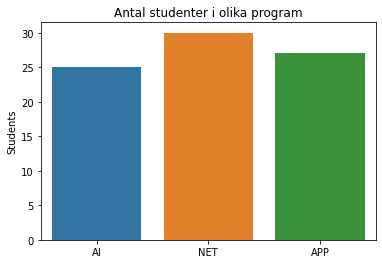

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(data=large_groups, x = large_groups.index, y = "Students")
plt.title("Antal studenter i olika program"); # Can also use seaborns methods

In [80]:
# Read Excel
import pandas as pd
import seaborn as sns
calories = pd.read_excel("Data/calories.xlsx")
calories.head(5)

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ


In [81]:
calories.iloc[3:9]

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ
5,CannedFruit,Canned Cranberries,100g,178 cal,748 kJ
6,CannedFruit,Canned Crushed Pineapple,100g,53 cal,223 kJ
7,CannedFruit,Canned Figs,100g,107 cal,449 kJ
8,CannedFruit,Canned Fruit Cocktail,100g,81 cal,340 kJ


In [82]:
calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   FoodCategory      2225 non-null   object
 1   FoodItem          2225 non-null   object
 2   per100grams       2225 non-null   object
 3   Cals_per100grams  2225 non-null   object
 4   KJ_per100grams    2225 non-null   object
dtypes: object(5)
memory usage: 87.0+ KB


In [83]:
calories.describe()

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
count,2225,2225,2225,2225,2225
unique,44,1993,2,524,524
top,BakingIngredients,Roast Beef,100g,100 cal,420 kJ
freq,95,4,1802,26,26


In [84]:
calories["FoodCategory"].unique()

array(['CannedFruit', 'Fruits', 'Tropical&ExoticFruits', 'PotatoProducts',
       'Vegetables', 'FastFood', 'Pizza', 'Cheese', 'CreamCheese',
       'Milk&DairyProducts', 'SlicedCheese', 'Yogurt', 'Beef&Veal',
       'ColdCuts&LunchMeat', 'Meat', 'Offal&Giblets', 'Pork',
       'Poultry&Fowl', 'Sausage', 'Venison&Game', 'Cakes&Pies',
       'Candy&Sweets', 'IceCream', '(Fruit)Juices',
       'AlcoholicDrinks&Beverages', 'Beer',
       'Non-AlcoholicDrinks&Beverages', 'Soda&SoftDrinks', 'Wine',
       'CerealProducts', 'Oatmeal,Muesli&Cereals', 'Pasta&Noodles',
       'Dishes&Meals', 'Soups', 'Legumes', 'Nuts&Seeds', 'Oils&Fats',
       'VegetableOils', 'BakingIngredients', 'Fish&Seafood',
       'Herbs&Spices', 'Pastries,Breads&Rolls', 'Sauces&Dressings',
       'Spreads'], dtype=object)

In [85]:
calories.columns

Index(['FoodCategory', 'FoodItem', 'per100grams', 'Cals_per100grams',
       'KJ_per100grams'],
      dtype='object')

In [87]:
calories["per100grams"].unique()

array(['100g', '100ml'], dtype=object)

## Data cleaning
- Convert string to int
- Chagne column names
- Seperate liquids and solids

In [88]:
calories = calories.rename(dict(Cals_per100grams = "Calories", per100grams = "per100"), axis = "columns")
calories.head()

,FoodCategory,FoodItem,per100,Calories,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ


In [89]:
calories["Calories"] = calories["Calories"].str[:-3].astype(int)
calories.head()

,FoodCategory,FoodItem,per100,Calories,KJ_per100grams
0,CannedFruit,Applesauce,100g,62,260 kJ
1,CannedFruit,Canned Apricots,100g,48,202 kJ
2,CannedFruit,Canned Blackberries,100g,92,386 kJ
3,CannedFruit,Canned Blueberries,100g,88,370 kJ
4,CannedFruit,Canned Cherries,100g,54,227 kJ


In [91]:
calories["per100"].value_counts()

100g     1802
100ml     423
Name: per100, dtype: int64

In [95]:
solids = calories[calories["per100"] == "100g"]
liquids = calories[calories["per100"] == "100ml"]
liquids.head()

,FoodCategory,FoodItem,per100,Calories,KJ_per100grams
409,Milk&DairyProducts,Almond Milk,100ml,17,71 kJ
410,Milk&DairyProducts,Buttermilk,100ml,62,260 kJ
412,Milk&DairyProducts,Coconut Milk,100ml,230,966 kJ
422,Milk&DairyProducts,Hot Chocolate,100ml,89,374 kJ
423,Milk&DairyProducts,Kefir,100ml,55,231 kJ


## Find top 5 categories with highest calories 

In [108]:
solids_top5 = solids.sort_values(by="Calories", ascending=False).head()
solids_top5

,FoodCategory,FoodItem,per100,Calories,KJ_per100grams
1621,Soups,Goulash,100g,1009,4238 kJ
1761,Oils&Fats,Lard,100g,902,3788 kJ
528,Beef&Veal,Beef Tallow,100g,902,3788 kJ
1756,Oils&Fats,Goose Fat,100g,898,3772 kJ
599,Meat,Chicken Fat,100g,898,3772 kJ


In [103]:
liquids_top5 = liquids.sort_values(by = "Calories", ascending = False).head()
liquids_top5

,FoodCategory,FoodItem,per100,Calories,KJ_per100grams
1751,Oils&Fats,Cod Liver Oil,100ml,1000,4200 kJ
1808,VegetableOils,Wheat Germ Oil,100ml,929,3902 kJ
1800,VegetableOils,Salmon Oil,100ml,911,3826 kJ
1789,VegetableOils,Menhaden Oil,100ml,911,3826 kJ
1759,Oils&Fats,Herring Oil,100ml,902,3788 kJ


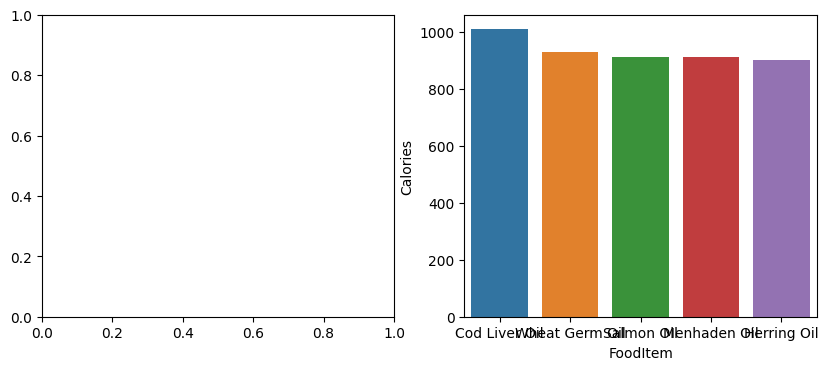

In [133]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2, dpi=100, figsize=(10,4))
sns.barplot(data=solids_top5, x="FoodItem", y="Calories")
sns.barplot(data=liquids_top5, x="FoodItem", y="Calories")